In [2]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors



plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (12,8)

maximum_nfv = 160 * 192 * 224

### EXPERIMENT 1
Predicted dice/nfv vs target dice/nfv using BlandAltman plot

In [ ]:
hyperpredict_bland_altman = pd.read_csv("../results/symnet_niftyreg/optimal_hp_0.5%_hyperpredict_niftyreg_retrained.csv")
hyperpredict_bland_altman = hyperpredict_bland_altman.drop(columns=['label', 'target_label'])
# hyperpredict_bland_altman.head(50)
hyperpredict_bland_altman = hyperpredict_bland_altman.groupby(['moving_index', 'fixed_index']).mean().reset_index()
print(len(hyperpredict_bland_altman))

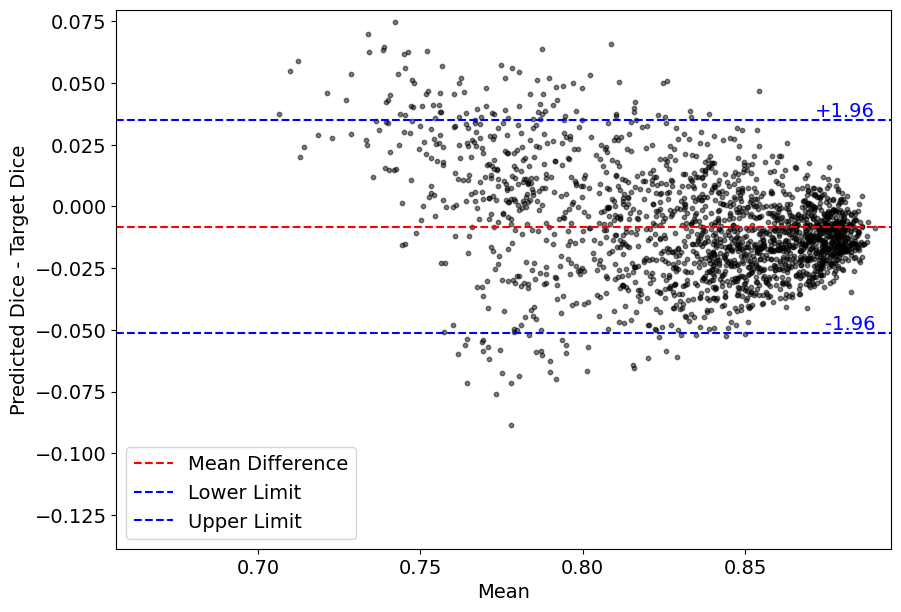

In [65]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 7))
differences = hyperpredict_bland_altman['predicted_dice'] - hyperpredict_bland_altman['target_dice']
means = (hyperpredict_bland_altman['predicted_dice'] + hyperpredict_bland_altman['target_dice']) / 2

mean_difference = np.mean(differences)
std_difference = np.std(differences)
lower_limit = mean_difference - 1.96 * std_difference
upper_limit = mean_difference + 1.96 * std_difference

plt.scatter(means, differences, color='black', s=10, alpha= 0.5)
plt.axhline(mean_difference, color='red', linestyle='--', label='Mean Difference')
plt.axhline(lower_limit, color='blue', linestyle='--', label='Lower Limit')
plt.axhline(upper_limit, color='blue', linestyle='--', label='Upper Limit')

plt.xlim(min(means) - 0.05, max(means) + 0.005)
plt.ylim(min(differences) - 0.05, max(differences) + 0.005)

plt.text(max(means), upper_limit , '+1.96', ha='right', va='bottom', color='blue')
plt.text(max(means), lower_limit, '-1.96', ha='right', va='bottom', color='blue')
plt.xlabel('Mean')
plt.ylabel('Predicted Dice - Target Dice')
plt.legend(loc = "lower left")
plt.show()

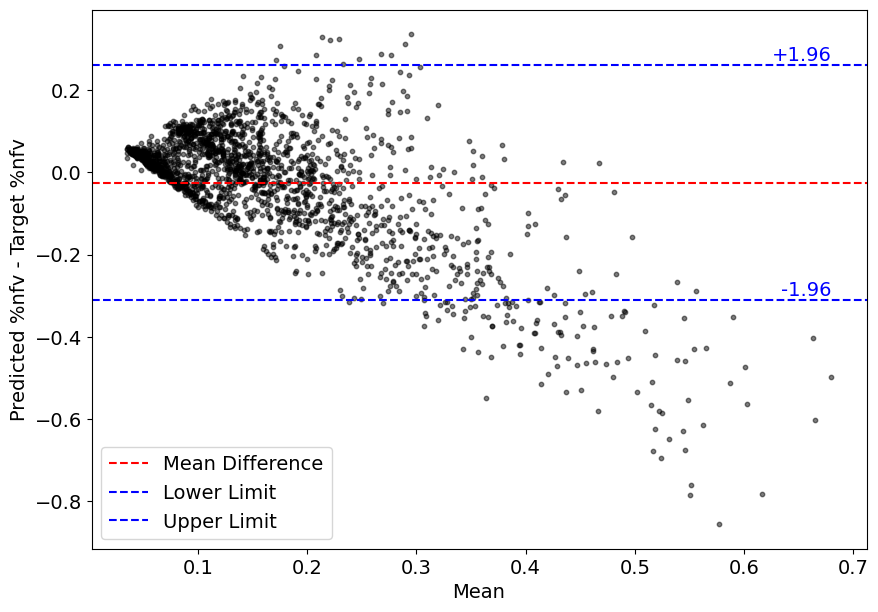

In [66]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 7))
differences = (hyperpredict_bland_altman['predicted_nfv']/maximum_nfv * 100) - (hyperpredict_bland_altman['target_nfv']/maximum_nfv * 100)
means = ((hyperpredict_bland_altman['predicted_nfv']/maximum_nfv*100) +( hyperpredict_bland_altman['target_nfv']/maximum_nfv*100)) / 2

mean_difference = np.mean(differences)
std_difference = np.std(differences)
lower_limit = mean_difference - 1.96 * std_difference
upper_limit = mean_difference + 1.96 * std_difference

plt.scatter(means, differences, color='black', s=10, alpha= 0.5)
plt.axhline(mean_difference, color='red', linestyle='--', label='Mean Difference')
plt.axhline(lower_limit, color='blue', linestyle='--', label='Lower Limit')
plt.axhline(upper_limit, color='blue', linestyle='--', label='Upper Limit')

# plt.xlim(min(means) - 0.05, max(means) + 0.005)
# plt.ylim(min(differences) - 0.05, max(differences) + 0.005)

plt.text(max(means), upper_limit , '+1.96', ha='right', va='bottom', color='blue')
plt.text(max(means), lower_limit, '-1.96', ha='right', va='bottom', color='blue')
plt.xlabel('Mean')
plt.ylabel('Predicted %nfv - Target %nfv')
plt.legend(loc = "lower left")
plt.show()

In [ ]:
plt.scatter(hyperpredict_bland_altman['target_dice'], hyperpredict_bland_altman['predicted_dice'], color='black', s=10, alpha= 0.5)
plt.show()

plt.scatter(hyperpredict_bland_altman['target_nfv']/maximum_nfv*100, hyperpredict_bland_altman['predicted_nfv']/maximum_nfv*100, color='black', s=10, alpha= 0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [68]:
#statistical analysis
#mean difference bbetween predicted and target dice
hyperpredict_bland_altman["dice_difference"] = abs(hyperpredict_bland_altman["predicted_dice"] - hyperpredict_bland_altman["target_dice"])
mean_difference = hyperpredict_bland_altman["dice_difference"].mean()
std = hyperpredict_bland_altman["dice_difference"].std()
print("mean and standard deviation of dice difference: ", mean_difference, std)

mean and standard deviation of dice difference:  0.018943213730877602 0.01388514410407071


In [ ]:
#mean difference bbetween predicted and target nfv
hyperpredict_bland_altman["nfv_difference"] = abs((hyperpredict_bland_altman["predicted_nfv"]/maximum_nfv *100) - (hyperpredict_bland_altman["target_nfv"]/maximum_nfv *100))
mean_difference = hyperpredict_bland_altman["nfv_difference"].mean()
std = hyperpredict_bland_altman["nfv_difference"].std()
print("mean and standard deviation of nfv difference: ", mean_difference, std)

### MAE of difference

In [ ]:
hyperpredict_optimal_registration = pd.read_csv("../results/symnet_niftyreg/final_result/sensitivity_analysis/xavier_0.025_seeded_target.csv")
hyperpredict_optimal_registration = hyperpredict_optimal_registration.groupby(["pair_idx"], as_index=False).apply(lambda x: x[x.predicted_dice == x.predicted_dice.max()]).reset_index(drop=True)
hyperpredict_optimal_registration["be"].unique()

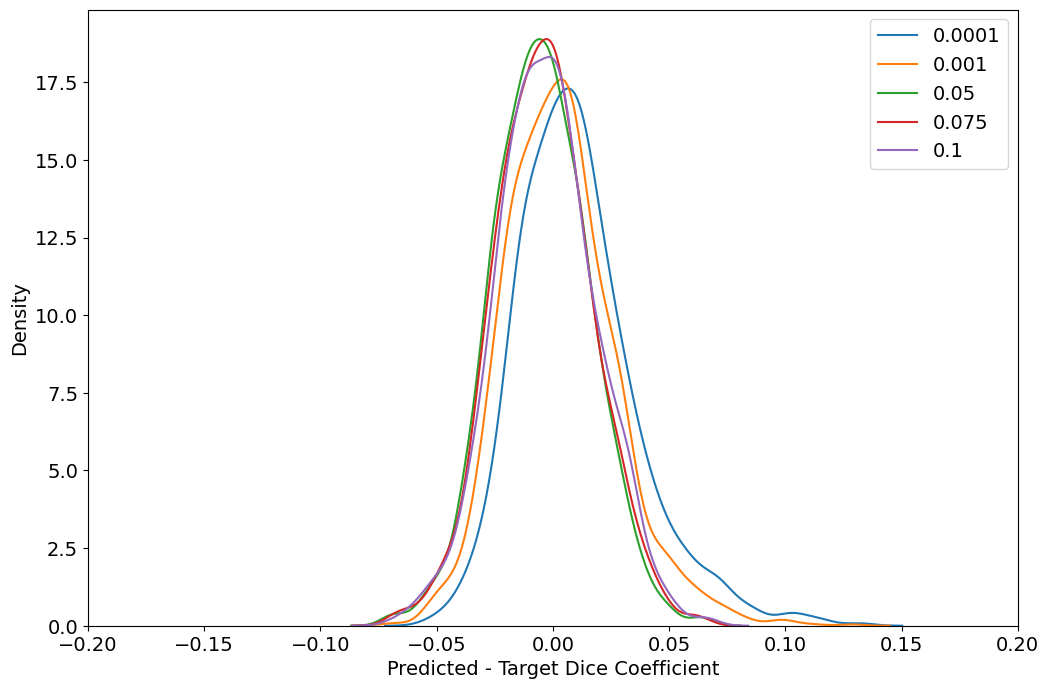

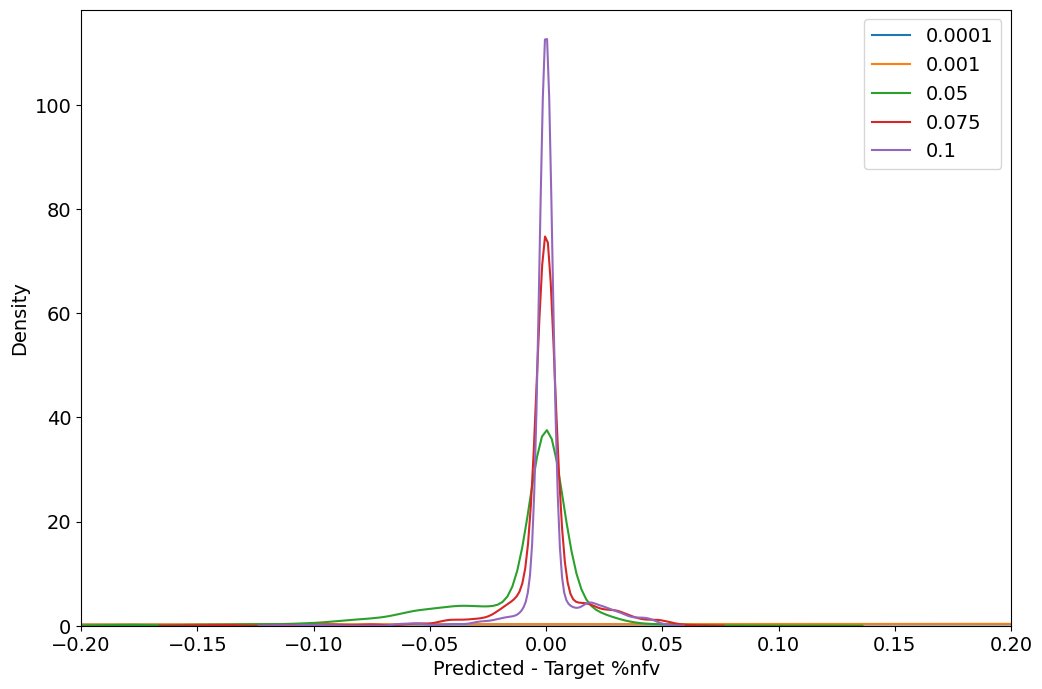

In [96]:
import pandas as pd
hyperpredict_bland_altman_mae = pd.read_csv("../results/symnet_niftyreg/sampled_lamda/sampled_lamda_values_images_be.csv")
hyperpredict_bland_altman_mae["dice_difference"] = hyperpredict_bland_altman_mae["predicted_dice"] - hyperpredict_bland_altman_mae["target_dice"]
hyperpredict_bland_altman_mae = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["be"] != 0.125]

hyperpredict_bland_altman_mae["nfv_difference"] = (hyperpredict_bland_altman_mae["predicted_nfv"]/ maximum_nfv)*100 - (hyperpredict_bland_altman_mae["target_nfv"]/maximum_nfv)*100

hyperpredict_bland_altman_mae["be"] = hyperpredict_bland_altman_mae["be"].round(4)
hyperpredict_bland_altman_mae = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["be"] != 0.0075]
hyperpredict_bland_altman_mae_sub = hyperpredict_bland_altman_mae
for i in hyperpredict_bland_altman_mae_sub["be"].unique():
    data = hyperpredict_bland_altman_mae_sub[hyperpredict_bland_altman_mae_sub["be"] == i]
    sns.kdeplot(data=data, x="dice_difference", label=i)
plt.xlabel("Predicted - Target Dice Coefficient")
plt.xlim(-0.2, 0.2)
plt.legend()
plt.show()




hyperpredict_bland_altman_mae_sub = hyperpredict_bland_altman_mae
for i in hyperpredict_bland_altman_mae_sub["be"].unique():
    data = hyperpredict_bland_altman_mae_sub[hyperpredict_bland_altman_mae_sub["be"] == i]
    sns.kdeplot(data=data, x="nfv_difference", label=i)
plt.xlabel("Predicted - Target %nfv")
plt.xlim(-0.2, 0.2)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
# hyperpredict_bland_altman_mae = pd.read_csv("../results/symnet_niftyreg/sampled_lamda/sampled_lamda_values_images_be.csv")

hyperpredict_bland_altman_mae = hyperpredict_bland_altman_mae.drop(columns=['label', 'target_label'])
hyperpredict_bland_altman_mae = hyperpredict_bland_altman_mae.groupby(['pair_idx']).mean().reset_index()
hyperpredict_bland_altman_mae = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["predicted_dice"] == hyperpredict_bland_altman_mae["predicted_dice"].max()]
print(hyperpredict_bland_altman_mae["be"].unique(), hyperpredict_bland_altman_mae["be"].min(), "be", hyperpredict_bland_altman_mae["be"].unique())

hyperpredict_bland_altman_mae["dice_difference"] = hyperpredict_bland_altman_mae["predicted_dice"] - hyperpredict_bland_altman_mae["target_dice"]
hyperpredict_bland_altman_mae["nfv_difference"] = (hyperpredict_bland_altman_mae["predicted_nfv"]/ maximum_nfv)*100 - (hyperpredict_bland_altman_mae["target_nfv"]/maximum_nfv)*100


for i in hyperpredict_bland_altman_mae["be"].unique():
    data = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["be"] == i]
    li = "{:.4f}".format(i)
    sns.kdeplot(data=data, x="dice_difference", label=li, warn_singular=False )
    
plt.xlabel("Predicted - Target Dice Coefficient")
plt.legend()
plt.show()


In [ ]:
hyperpredict_bland_altman_mae = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["le"] != 1.0]

for i in hyperpredict_bland_altman_mae["le"].unique():

    data = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["le"] == i]
    #plot kde and format the label to 2 decimal places
    li = "{:.4f}".format(i)

    sns.kdeplot(data=data, x="nfv_difference", label=li, warn_singular=False) #formart the label to 2 decimal places
    
plt.xlabel("Predicted - Target %nfv")
plt.legend()
plt.xlim(-0.2, 0.2)
plt.show()



##### COMBINED EVALUATION OF DICE AND NFV

[9.99999975e-05 1.00000005e-03 7.49999983e-03 5.00000007e-02
 7.50000030e-02 1.00000001e-01 1.25000000e-01 1.00000000e+00]


/tmp/ipykernel_3060497/4112999818.py:9: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(data=hyperpredict_bland_combined, x="predicted_nfv", y="predicted_dice", hue="be", palette=palette, legend='full')


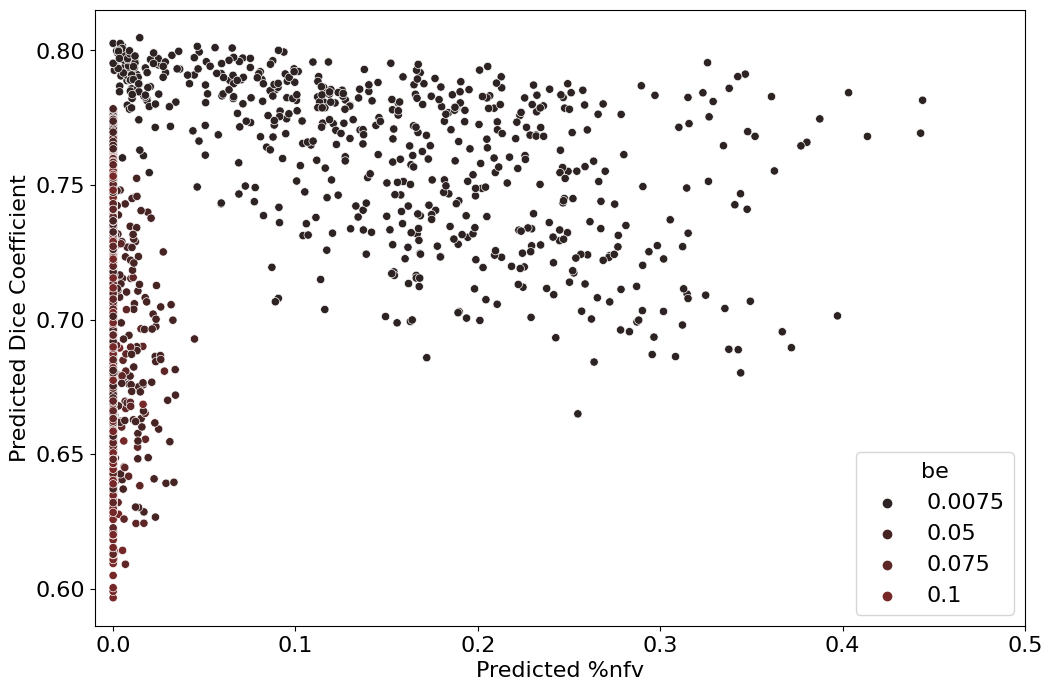

In [9]:
hyperpredict_bland_combined = pd.read_csv("../results/symnet_niftyreg/sampled_lamda/sampled_lamda_values_images_be.csv")
print(hyperpredict_bland_combined["be"].unique())
hyperpredict_bland_combined = hyperpredict_bland_combined[hyperpredict_bland_combined["sx"] == 5]
hyperpredict_bland_combined = hyperpredict_bland_combined[hyperpredict_bland_combined["be"] < 0.120]
hyperpredict_bland_combined["be"] = hyperpredict_bland_combined["be"].round(4)
palette = palette = sns.dark_palette("brown", n_colors=6)
hyperpredict_bland_combined["predicted_nfv"] = hyperpredict_bland_combined["predicted_nfv"]/maximum_nfv*100
hyperpredict_bland_combined= hyperpredict_bland_combined[hyperpredict_bland_combined["predicted_nfv"] < 0.5]
sns.scatterplot(data=hyperpredict_bland_combined, x="predicted_nfv", y="predicted_dice", hue="be", palette=palette, legend='full')

plt.xlabel("Predicted %nfv")
plt.ylabel("Predicted Dice Coefficient")
plt.legend(title="be")
plt.xlim(-0.01, 0.5)
plt.show()

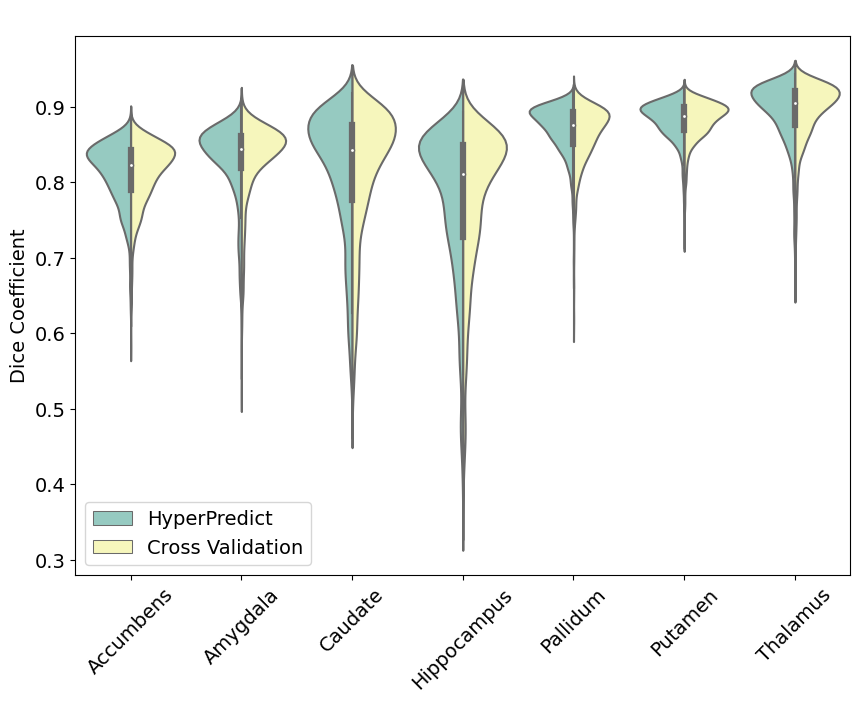

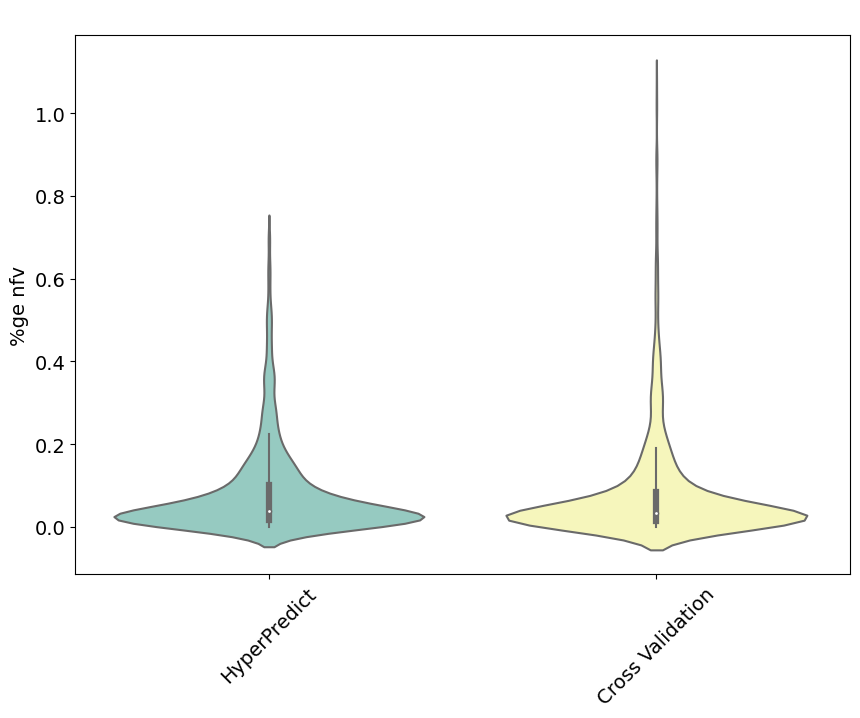

In [17]:
hyperpredict_exp2 = pd.read_csv("../results/symnet_niftyreg/optimal_hp_0.5%_hyperpredict_niftyreg_retrained.csv")


hyperpredict_exp2.rename(columns={"target_dice": "dice"}, inplace=True)
hyperpredict_exp2.rename(columns={"target_nfv": "nfv"}, inplace=True)
hyperpredict_exp2["Method"] = "HyperPredict"
selected_labels = ["Accumbens", "Amygdala", "Caudate", "Hippocampus", "Pallidum", "Putamen", "Thalamus"]
hyperpredict_exp2 = hyperpredict_exp2[hyperpredict_exp2["label"].isin(selected_labels)].reset_index(drop=True)

cross_validation_exp2 =  pd.read_csv("../results/cross_validation/niftyreg/niftyreg_grid_search_optimal_0.0075.csv")#be
cross_validation_exp2 = cross_validation_exp2[cross_validation_exp2["label"].isin(selected_labels)].reset_index(drop=True)
cross_validation_exp2.rename(columns={"target_dice": "dice"}, inplace=True)
cross_validation_exp2.rename(columns={"target_nfv": "nfv"}, inplace=True)
cross_validation_exp2["Method"] = "Cross Validation"

hyperpredict_vs_crossval = pd.concat([hyperpredict_exp2, cross_validation_exp2])
hyperpredict_vs_crossval["nfv_percentage"] = (hyperpredict_vs_crossval["nfv"] / maximum_nfv) *100


#plot dice
plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 14})
sns.violinplot(x="label", y="dice", hue="Method", data=hyperpredict_vs_crossval, palette="Set3", split=True, as_cmap=True)
plt.title(" ");
plt.xlabel("");
plt.ylabel("Dice Coefficient");
plt.xticks(rotation=45)
plt.grid(False)
plt.legend(loc='lower left')
plt.show();


#plot nfv
hyperpredict_exp2_nfv = hyperpredict_exp2.drop(columns=['label', 'Method'])
cross_validation_exp2_nfv = cross_validation_exp2.drop(columns=['label', 'Method'])
hyperpredict_exp2_nfv = hyperpredict_exp2_nfv.groupby(["moving_index", "fixed_index"]).mean().reset_index()
hyperpredict_exp2_nfv["Method"] = "HyperPredict"
cross_validation_exp2_nfv = cross_validation_exp2_nfv.groupby(["moving_index", "fixed_index"]).mean().reset_index()
cross_validation_exp2_nfv["Method"] = "Cross Validation"
hyperpredict_vs_crossval_nfv = pd.concat([hyperpredict_exp2_nfv, cross_validation_exp2_nfv])
hyperpredict_vs_crossval_nfv["nfv_percentage"] = (hyperpredict_vs_crossval_nfv["nfv"] / maximum_nfv) *100


plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 14})
sns.violinplot(x="Method", y="nfv_percentage", data=hyperpredict_vs_crossval_nfv, palette="Set3", hue=None, split=False, as_cmap=True)

plt.title(" ");
plt.xlabel("");
plt.ylabel("%ge nfv");
plt.xticks(rotation=45)
plt.grid(False)
plt.show();



In [ ]:
#statistical analysis
merged_df = pd.merge(hyperpredict_exp2, cross_validation_exp2, on=['moving_index', 'fixed_index', 'label'])
merged_df["dice_difference"] = abs(merged_df["dice_x"] - merged_df["dice_y"])
mean_difference = merged_df["dice_difference"].mean()
std = merged_df["dice_difference"].std()
print("mean and standard deviation of dice difference: ", mean_difference, std)

merged_df["nfv_difference"] = abs((merged_df["nfv_x"]/maximum_nfv *100) - (merged_df["nfv_y"]/maximum_nfv *100))
mean_difference = merged_df["nfv_difference"].mean()
std = merged_df["nfv_difference"].std()
print("mean and standard deviation of nfv difference: ", mean_difference, std)

# wilcoxon signed rank test
hyperpredict_exp2_wilcoxon = hyperpredict_exp2.drop(columns=['target_label'], inplace=True)
hyperpredict_exp2_wilcoxon = hyperpredict_exp2.drop(columns=['Method'], inplace=True)

hyperpredict_exp2_wilcoxon = hyperpredict_exp2.groupby(['label']).mean().reset_index()
cross_validation_exp2_wilcoxon = cross_validation_exp2.drop(columns=['Method'], inplace = True)
cross_validation_exp2_wilcoxon = cross_validation_exp2.groupby(['label']).mean().reset_index()
merged_df_wilcoxon = pd.merge(hyperpredict_exp2_wilcoxon, cross_validation_exp2_wilcoxon, on=['label'])

dice_statistics, dice_p_value  = wilcoxon(merged_df_wilcoxon["dice_x"], merged_df_wilcoxon["dice_y"])
print("dice wilcoxon: ", dice_p_value)
nfv_statistics, nfv_p_value = wilcoxon(merged_df_wilcoxon["nfv_x"]/maximum_nfv*100, merged_df_wilcoxon["nfv_y"]/maximum_nfv*100)
print("nfv wilcoxon: ", nfv_p_value)


In [14]:
hyperpredict_exp2_case = hyperpredict_exp2.drop(columns=['label'])
hyperpredict_exp2_case = hyperpredict_exp2_case.groupby(['moving_index', 'fixed_index']).mean().reset_index()
cross_validation_exp2_case = cross_validation_exp2.drop(columns=['label'])
cross_validation_exp2_case = cross_validation_exp2_case.groupby(['moving_index', 'fixed_index']).mean().reset_index()
merged_df_case = pd.merge(hyperpredict_exp2_case, cross_validation_exp2_case, on=['moving_index', 'fixed_index'])

In [ ]:
#approximate thie column to 2 decimal places
merged_df_case["dice_x"] = merged_df_case["dice_x"].round(3)
merged_df_case["dice_y"] = merged_df_case["dice_y"].round(3)


x = np.linspace(0.65, 0.95, 50)
y = x

#cross valdidation vs hyperpredict
equal = merged_df_case["dice_y"] == merged_df_case["dice_x"]
worse_case = merged_df_case["dice_y"] > merged_df_case["dice_x"]
best_case = merged_df_case["dice_y"] < merged_df_case["dice_x"]

plt.scatter(merged_df_case[best_case]["dice_y"], merged_df_case[best_case]["dice_x"], color='blue', s=10, marker='>', label = 'Better')
plt.scatter(merged_df_case[equal]["dice_y"], merged_df_case[equal]["dice_x"], color='black', s=12, marker='o', label = 'Equal')
plt.scatter(merged_df_case[worse_case]["dice_y"], merged_df_case[worse_case]["dice_x"], color='red', s=10,  marker='x', label = 'Worse')
plt.xlabel("Cross Validation Dice Coefficient")
plt.ylabel("HyperPredict Dice Coefficient")
plt.plot(x, y, color='black', linestyle='--')
plt.legend(loc = "best")
plt.show()


#nfv
merged_df_case["nfv_x"] = merged_df_case["nfv_x"].round(2)
merged_df_case["nfv_y"] = merged_df_case["nfv_y"].round(2)

w = np.linspace(0, 1, 50)
z = w

equal = merged_df_case["nfv_y"] == merged_df_case["nfv_x"]
worse_case = merged_df_case["nfv_y"] < merged_df_case["nfv_x"]
best_case = merged_df_case["nfv_y"] > merged_df_case["nfv_x"]
plt.scatter(merged_df_case[best_case]["nfv_y"]/maximum_nfv*100, merged_df_case[best_case]["nfv_x"]/maximum_nfv*100, color='blue', s=10,  marker='>', label = 'Better')
plt.scatter(merged_df_case[equal]["nfv_y"]/maximum_nfv*100, merged_df_case[equal]["nfv_x"]/maximum_nfv*100, color='black', s=12, marker='o', label = 'Equal')
plt.scatter(merged_df_case[worse_case]["nfv_y"]/maximum_nfv*100, merged_df_case[worse_case]["nfv_x"]/maximum_nfv*100, color='red', s=10,  marker='x', label = 'Worse')

plt.plot(w, z, color='black', linestyle='--')
plt.xlabel("Cross Validation %nfv")
plt.ylabel("HyperPredict %nfv")
plt.legend(loc = "upper left")
plt.show()

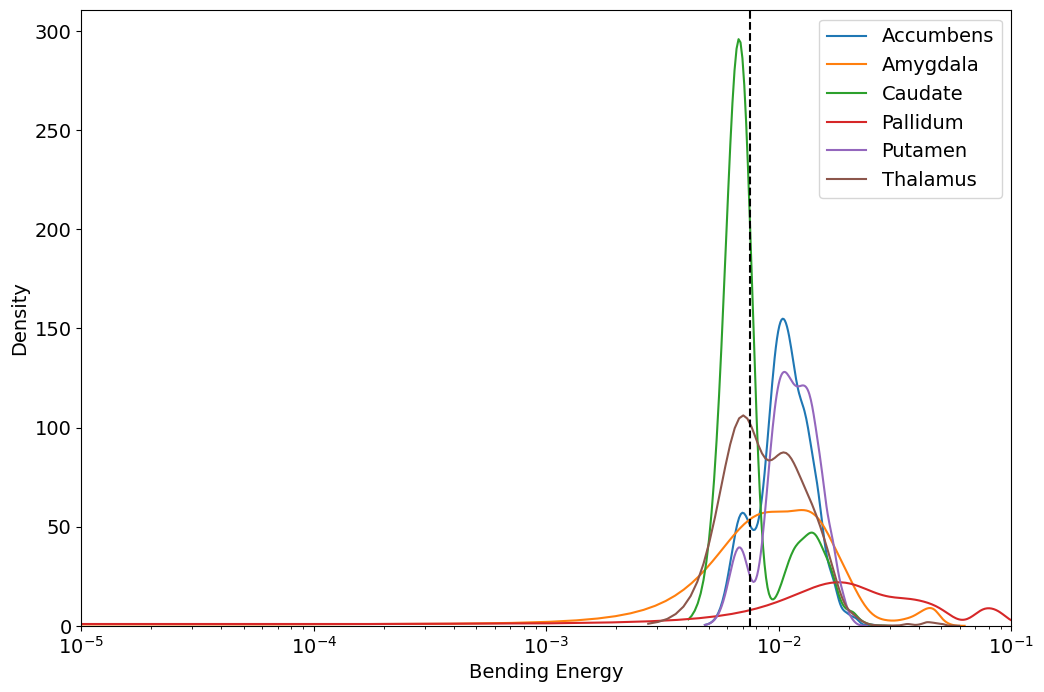

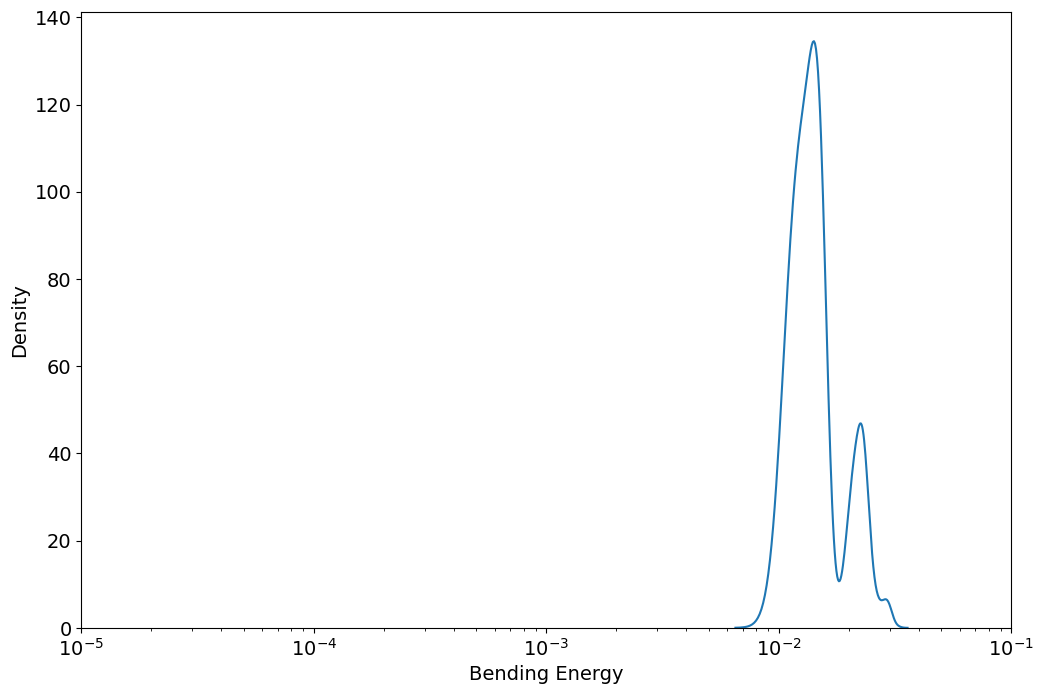

In [20]:
hyperpredict_exp2 = pd.read_csv("../results/symnet_niftyreg/optimal_hp_0.5%_hyperpredict_niftyreg_retrained.csv")


for label in hyperpredict_exp2['label'].unique():
    if label != "Hippocampus":
        subset_data = hyperpredict_exp2[hyperpredict_exp2['label'] == label]
        sns.kdeplot(data=subset_data, x='be', label=label)


plt.axvline(x=0.0075, color='black', linestyle='--')
plt.xlabel('Bending Energy')
plt.xscale('log')
plt.xlim(0.00001, 0.1)
plt.ylabel('Density')
plt.legend()
plt.show()


hyperpredict_exp2_img_dist = hyperpredict_exp2.drop(columns=["label"])
hyperpredict_exp2_img_dist = hyperpredict_exp2_img_dist.groupby(["pair_idx"]).mean().reset_index()
sns.kdeplot(data=hyperpredict_exp2_img_dist, x='be')
plt.xlabel('Bending Energy')
plt.xlim(0.00001, 0.1)
plt.ylabel('Density')
plt.xscale('log')
plt.show()

#### Bending energy and Linear Elasticity

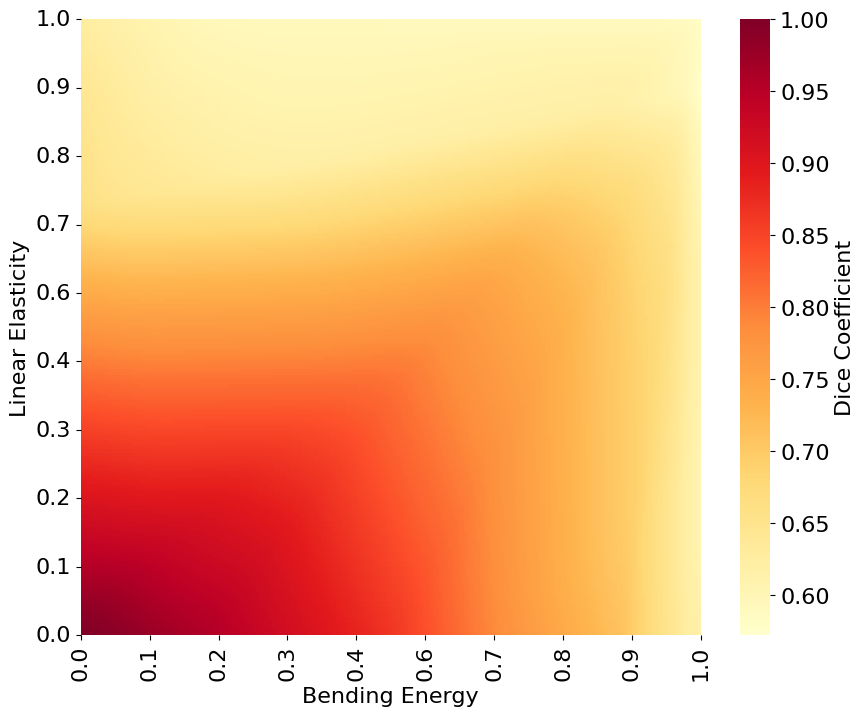

In [12]:
#dice
be_le = pd.read_csv("../results/symnet_niftyreg/mean_encoding_main_hyperpredict_network_nfv_194404_be_le_sx-11.5_0_datasize0.25_no_constraint_full_image.csv")


#percentage nfv
be_le["predicted_jac"] = (be_le["predicted_jac"]/maximum_nfv)*100
heatmap_data_dice = be_le.pivot_table(values='predicted_dice', index='le', columns='be')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_dice, annot=False, cmap='YlOrRd', fmt=".1f", cbar=True, cbar_kws={'label': 'Dice Coefficient'})

x_min = min(heatmap_data_dice.columns)
x_max = max(heatmap_data_dice.columns)
x_tick_values = np.linspace(x_min, x_max, num=10)
x_tick_labels = [f'{val:.1f}' for val in x_tick_values]
y_min = min(heatmap_data_dice.index)
y_max = max(heatmap_data_dice.index)
y_tick_values = np.linspace(y_min, y_max, num=10)
y_tick_labels = [f'{val:.1f}' for val in y_tick_values]
x_tick_locs = np.linspace(0, len(heatmap_data_dice.columns) - 1, num=10)
plt.xticks(x_tick_locs, x_tick_labels)
y_tick_locs = np.linspace(0, len(heatmap_data_dice.index) - 1, num=10)
plt.yticks(y_tick_locs, y_tick_labels)

plt.xlim(0, len(heatmap_data_dice.columns) - 1)
plt.ylim(0, len(heatmap_data_dice.index) - 1)
plt.xlabel('Bending Energy')
plt.ylabel('Linear Elasticity')
plt.show()



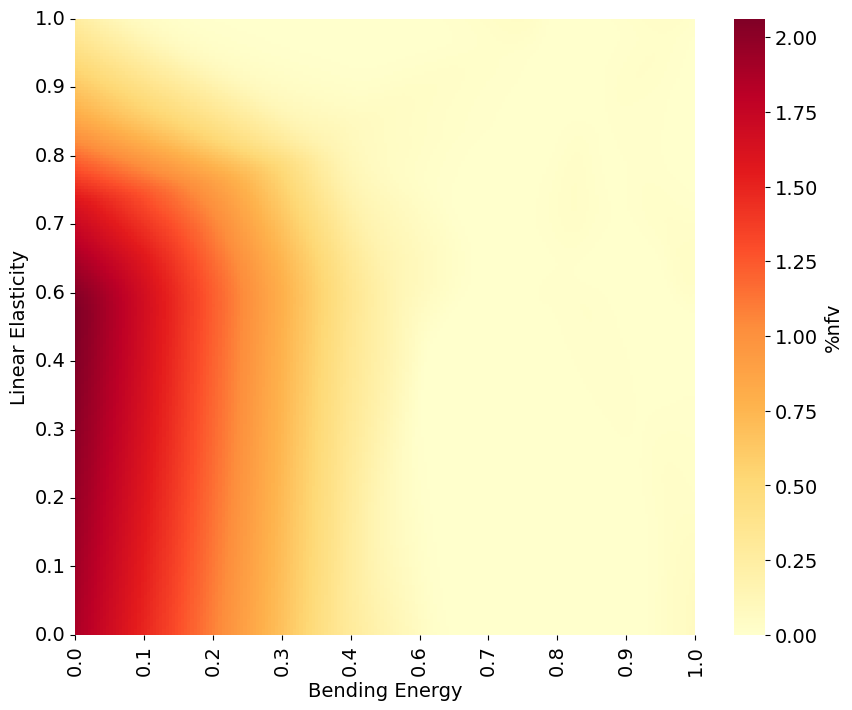

In [53]:
heatmap_data_jac = be_le.pivot_table(values='predicted_jac', index='le', columns='be')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_jac, annot=False, cmap='YlOrRd', fmt=".1f", cbar=True, cbar_kws={'label': '%nfv'})

x_min = min(heatmap_data_jac.columns)
x_max = max(heatmap_data_jac.columns)
x_tick_values = np.linspace(x_min, x_max, num=10)
x_tick_labels = [f'{val:.1f}' for val in x_tick_values]
y_min = min(heatmap_data_jac.index)
y_max = max(heatmap_data_jac.index)
y_tick_values = np.linspace(y_min, y_max, num=10)
y_tick_labels = [f'{val:.1f}' for val in y_tick_values]
x_tick_locs = np.linspace(0, len(heatmap_data_jac.columns) - 1, num=10)
plt.xticks(x_tick_locs, x_tick_labels)
y_tick_locs = np.linspace(0, len(heatmap_data_jac.index) - 1, num=10)
plt.yticks(y_tick_locs, y_tick_labels)

plt.xlim(0, len(heatmap_data_jac.columns) - 1)
plt.ylim(0, len(heatmap_data_jac.index) - 1)
plt.xlabel('Bending Energy')
plt.ylabel('Linear Elasticity')
plt.show()

#### labels

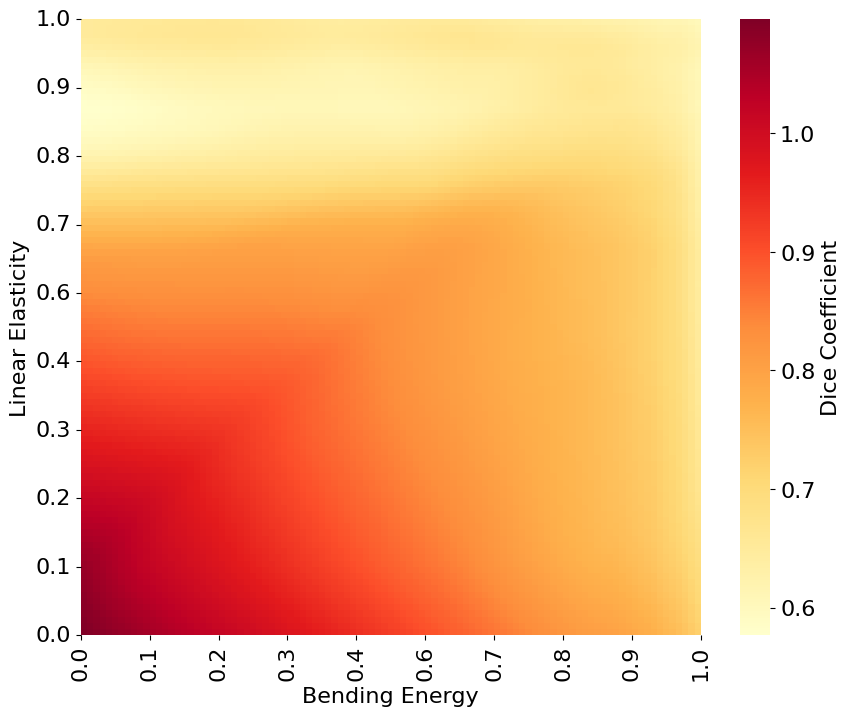

In [2]:
#dice
be_le = pd.read_csv("../results/symnet_niftyreg/mean_encoding_main_hyperpredict_network_nfv_194404_be_le_sx-11.5_0_datasize0.25_no_constraint_full_label.csv")

#percentage nfv
be_le["predicted_jac"] = (be_le["predicted_jac"]/maximum_nfv)*100
heatmap_data_dice = be_le.pivot_table(values='predicted_dice', index='le', columns='be')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_dice, annot=False, cmap='YlOrRd', fmt=".1f", cbar=True, cbar_kws={'label': 'Dice Coefficient'})

x_min = min(heatmap_data_dice.columns)
x_max = max(heatmap_data_dice.columns)
x_tick_values = np.linspace(x_min, x_max, num=10)
x_tick_labels = [f'{val:.1f}' for val in x_tick_values]
y_min = min(heatmap_data_dice.index)
y_max = max(heatmap_data_dice.index)
y_tick_values = np.linspace(y_min, y_max, num=10)
y_tick_labels = [f'{val:.1f}' for val in y_tick_values]
x_tick_locs = np.linspace(0, len(heatmap_data_dice.columns) - 1, num=10)
plt.xticks(x_tick_locs, x_tick_labels)
y_tick_locs = np.linspace(0, len(heatmap_data_dice.index) - 1, num=10)
plt.yticks(y_tick_locs, y_tick_labels)

plt.xlim(0, len(heatmap_data_dice.columns) - 1)
plt.ylim(0, len(heatmap_data_dice.index) - 1)
plt.xlabel('Bending Energy')
plt.ylabel('Linear Elasticity')
plt.show()



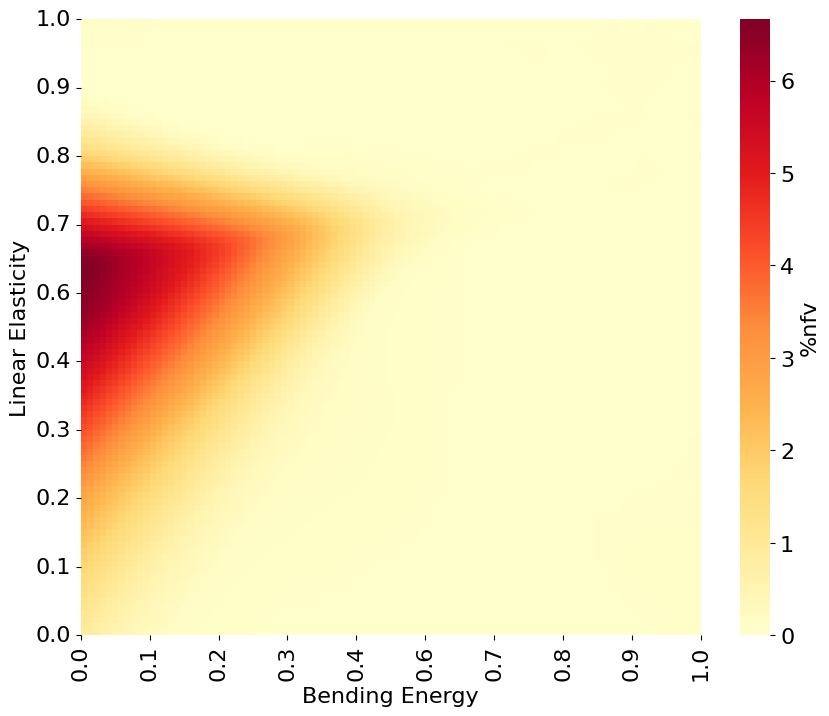

In [17]:
heatmap_data_jac = be_le.pivot_table(values='predicted_nfv', index='le', columns='be')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_jac, annot=False, cmap='YlOrRd', fmt=".1f", cbar=True, cbar_kws={'label': '%nfv'})

x_min = min(heatmap_data_jac.columns)
x_max = max(heatmap_data_jac.columns)
x_tick_values = np.linspace(x_min, x_max, num=10)
x_tick_labels = [f'{val:.1f}' for val in x_tick_values]
y_min = min(heatmap_data_jac.index)
y_max = max(heatmap_data_jac.index)
y_tick_values = np.linspace(y_min, y_max, num=10)
y_tick_labels = [f'{val:.1f}' for val in y_tick_values]
x_tick_locs = np.linspace(0, len(heatmap_data_jac.columns) - 1, num=10)
plt.xticks(x_tick_locs, x_tick_labels)
y_tick_locs = np.linspace(0, len(heatmap_data_jac.index) - 1, num=10)
plt.yticks(y_tick_locs, y_tick_labels)

plt.xlim(0, len(heatmap_data_jac.columns) - 1)
plt.ylim(0, len(heatmap_data_jac.index) - 1)
plt.xlabel('Bending Energy')
plt.ylabel('Linear Elasticity')
plt.show()

### joint distribution of optimal be and le across all images

<Figure size 1200x1000 with 0 Axes>

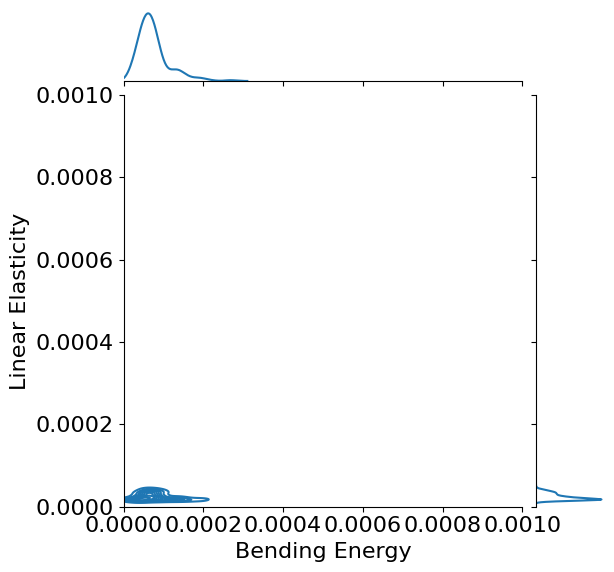

In [24]:
plt.figure(figsize=(12, 10))
be_le = pd.read_csv("../results/symnet_niftyreg/mean_encoding_main_hyperpredict_network_nfv_194404_be_le_sx-11.5_0_datasize0.25_no_constraint_full_image.csv")
be_le = be_le[be_le["predicted_jac"] < (0.005 * maximum_nfv)]
be_le = be_le[be_le["predicted_dice"] < 1.0]
be_le["predicted_jac"] = (be_le["predicted_jac"]/maximum_nfv)*100
be_le = be_le.groupby(["pair_idx"]).apply(lambda x: x.loc[x['predicted_dice'].idxmax()]).reset_index(drop=True)
sns.jointplot(data=be_le, x="be", y="le", kind="kde")
plt.xlabel("Bending Energy")
plt.ylabel("Linear Elasticity")
plt.xlim(0, 0.001)
plt.ylim(0, 0.001)
plt.show();

# single sample Experiment

0.0067379469983279 0.007840247824788
0.7695919275283813


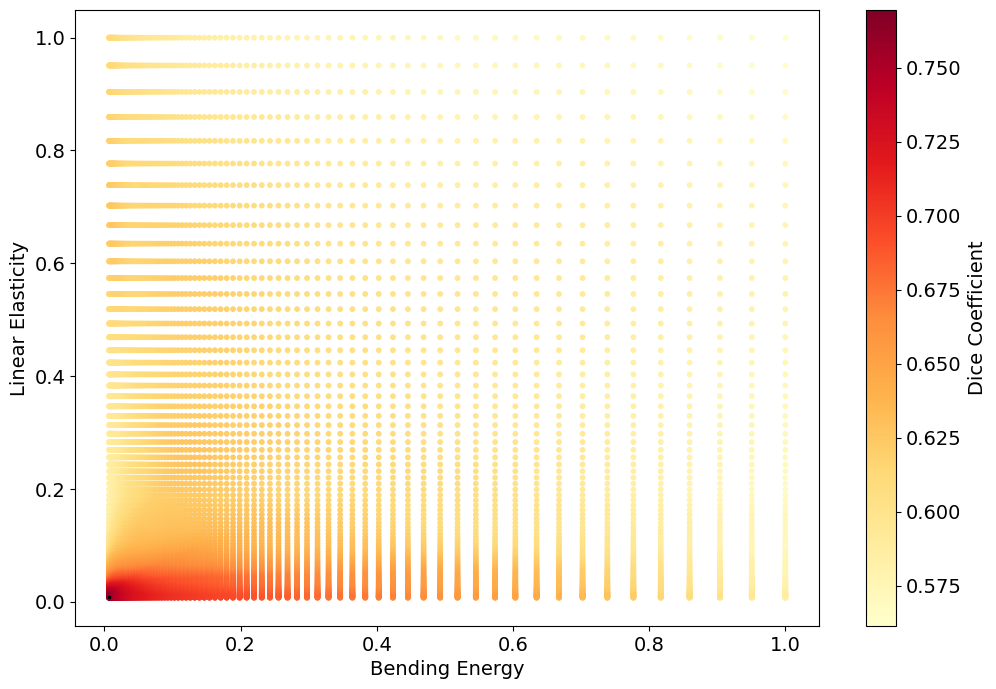

In [44]:
#dice
single_sample = pd.read_csv("../results/symnet_niftyreg/single_image/mean_encoding_main_hyperpredict_network_datasize0.25_single.csv")
single_sample = single_sample[single_sample["predicted_jac"] < (0.005 * maximum_nfv)]
single_sample["predicted_jac"] = (single_sample["predicted_jac"]/maximum_nfv)*100
plt.scatter(single_sample["be"], single_sample["le"], c=single_sample["predicted_dice"], s = 10, cmap='YlOrRd')
clbr = plt.colorbar()
clbr.set_label("Dice Coefficient")
max_dice = single_sample["predicted_dice"].max()
be = single_sample[single_sample["predicted_dice"] == max_dice]["be"].values[0]
le = single_sample[single_sample["predicted_dice"] == max_dice]["le"].values[0]
print(be, le)
print(max_dice)
plt.scatter(be, le, marker='.', s = 10, color='black')
plt.xlabel("Bending Energy")
plt.ylabel("Linear Elasticity")
plt.show()


0.0067379469983279 0.007840247824788


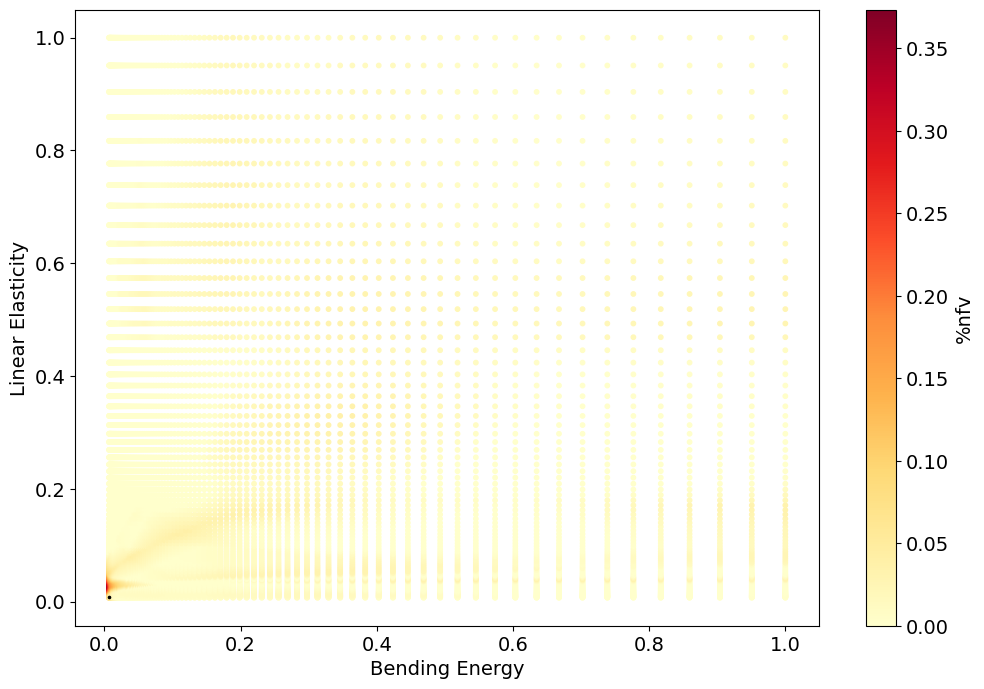

In [45]:
#jac

plt.scatter(single_sample["be"], single_sample["le"], c=single_sample["predicted_jac"], s = 10, cmap='YlOrRd')
clbr = plt.colorbar()
clbr.set_label("%nfv")
max_dice = single_sample["predicted_dice"].max()
be = single_sample[single_sample["predicted_dice"] == max_dice]["be"].values[0]
le = single_sample[single_sample["predicted_dice"] == max_dice]["le"].values[0]
print(be, le)
plt.scatter(be, le, marker='.', s = 10, color='black')
plt.xlabel("Bending Energy")
plt.ylabel("Linear Elasticity")
plt.show()


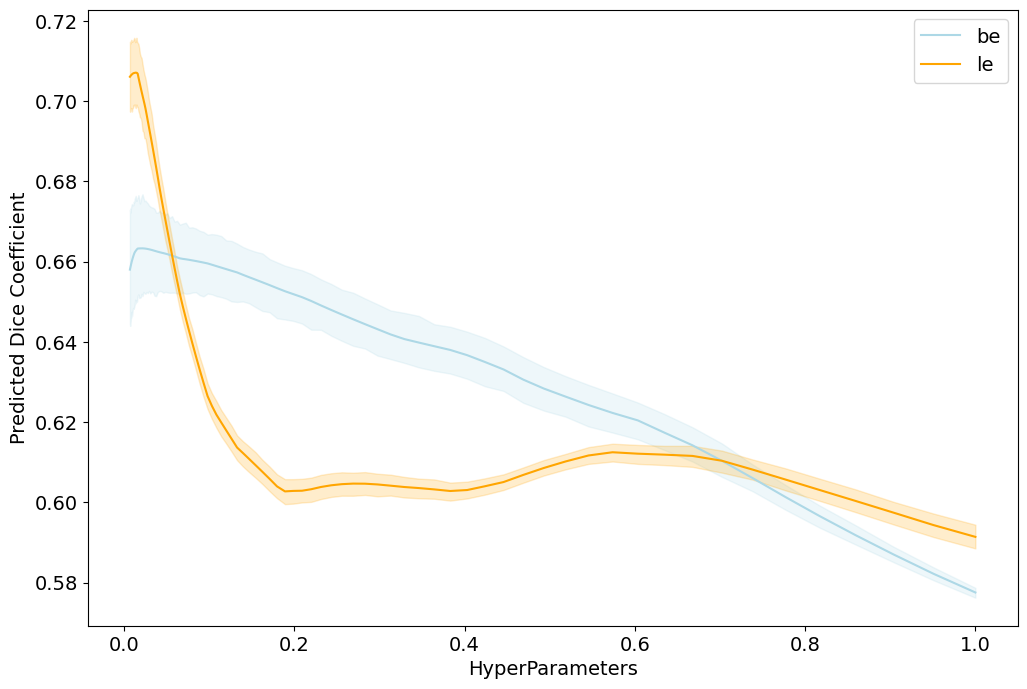

In [46]:
#line plot for above
sns.lineplot(data=single_sample, x="be", y="predicted_dice", color = 'lightblue', errorbar='ci', estimator=np.mean)
sns.lineplot(data=single_sample, x="le", y="predicted_dice", color = "orange", errorbar='ci', estimator = np.mean)
max_dice = single_sample["predicted_dice"].max()
be = single_sample[single_sample["predicted_dice"] == max_dice]["be"].values[0]
le = single_sample[single_sample["predicted_dice"] == max_dice]["le"].values[0]

# plt.scatter(x = be, y = max_dice, marker='.', s = 20, color='black')
plt.xlabel("HyperParameters")
plt.ylabel("Predicted Dice Coefficient")

custom_legend = [
    plt.Line2D([0], [0], color='lightblue',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='orange',  linestyle='-', markersize=5),
]
legend_labels = ['be','le']

plt.legend(custom_legend, legend_labels)

plt.show()

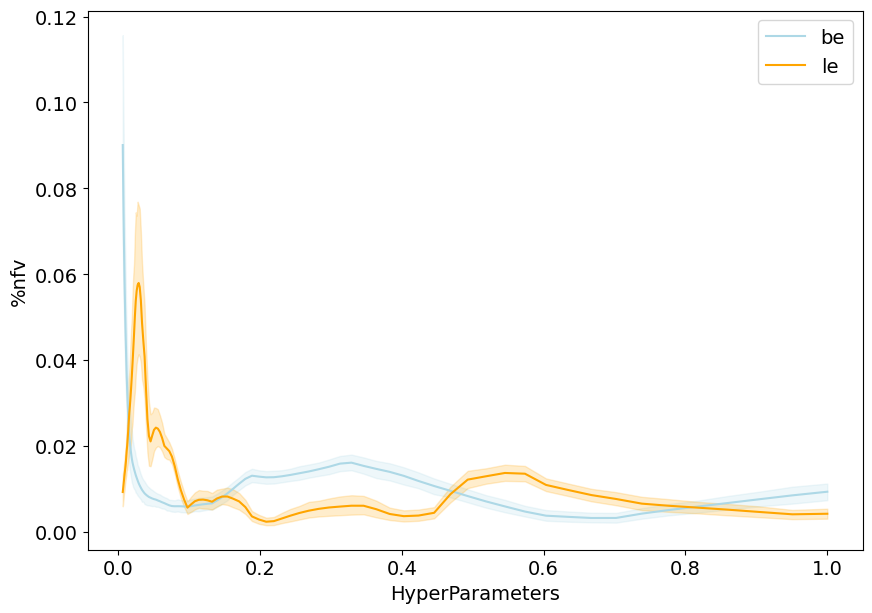

In [47]:
#line plot for above
plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 14})
sns.lineplot(data=single_sample, x="be", y="predicted_jac", color = 'lightblue', estimator=np.mean)
sns.lineplot(data=single_sample, x="le", y="predicted_jac", color = 'orange', estimator=np.mean)

nfv = single_sample[single_sample["predicted_dice"] == max_dice]["predicted_jac"].values[0]
# plt.scatter(x = be, y = nfv, marker='.', s = 20, color='black')
plt.xlabel("HyperParameters")
plt.ylabel("%nfv")
custom_legend = [
    plt.Line2D([0], [0], color='lightblue',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='orange',  linestyle='-', markersize=5),

]
legend_labels = ['be','le']
plt.legend(custom_legend, legend_labels)
plt.show()

In [ ]:

formated_column = single_sample.copy()
formated_column['le'] = single_sample['le'].map('{:.4f}'.format)
formated_column['be'] = single_sample['be'].map('{:.4f}'.format)

sns.kdeplot(data=formated_column, x="predicted_jac", y="predicted_dice", hue="le", fill=True, legend=False, common_norm=False, alpha=0.1, palette='crest')

legend = plt.legend(title='Le', labels=formated_column["le"].unique(), frameon=True, loc='best')
legend_handles = legend_handles

color_codes = [mcolors.to_hex(handle.get_facecolor()) for handle in legend_handles]

# Print the labels and their associated color codes
for label, code in zip(legend.get_texts(), color_codes):
    print(f"Label: {label.get_text()} - Color code: {code}")

plt.xlabel("%nfv")
plt.ylabel("Predicted Dice Coefficient")
plt.show()

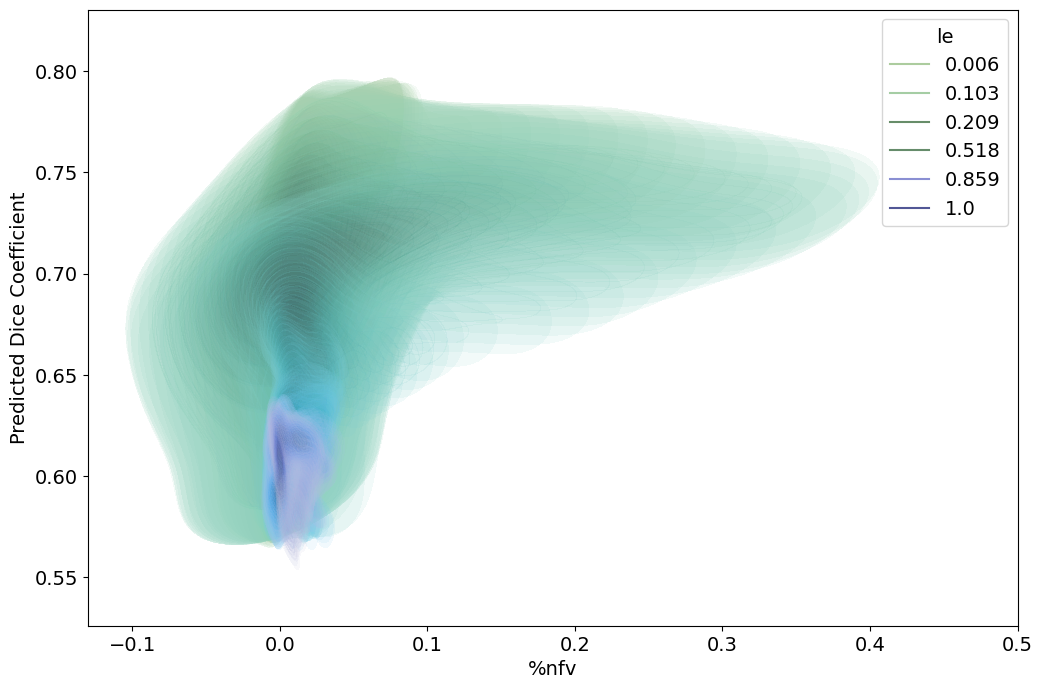

In [57]:
#le

filtered_le = [0.006,0.103,0.209, 0.518, 0.859, 1.0]
sns.kdeplot(data=formated_column, x="predicted_jac", y="predicted_dice", hue="le",  fill=True, legend=True, common_norm=False,  alpha=0.1, palette='crest')


custom_legend = [
    plt.Line2D([0], [0], color= '#accc9e',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#a5cda4',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#678d69',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#658c6b',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#8a8fd3',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#525796',  linestyle='-', markersize=5),
]
plt.xlabel("%nfv")
plt.ylabel("Predicted Dice Coefficient")
legend = plt.legend(title='le', handles=custom_legend, labels=filtered_le, frameon=True, loc='best')
plt.show()



In [ ]:
sns.kdeplot(data=formated_column, x="predicted_jac", y="predicted_dice", hue="be", fill=True, legend=True, common_norm=False, alpha=0.1, palette='crest')


In [ ]:
#be
sns.kdeplot(data=formated_column, x="predicted_jac", y="predicted_dice", hue="be", fill=True, legend=False, common_norm=False, alpha=0.1, palette='crest')

legend = plt.legend(title='Le', labels=formated_column["be"].unique(), frameon=True, loc='best')
legend_handles = legend_handles

color_codes = [mcolors.to_hex(handle.get_facecolor()) for handle in legend_handles]

# Print the labels and their associated color codes
for label, code in zip(legend.get_texts(), color_codes):
    print(f"Label: {label.get_text()} - Color code: {code}")

plt.xlabel("%nfv")
plt.ylabel("Predicted Dice Coefficient")
# plt.show()

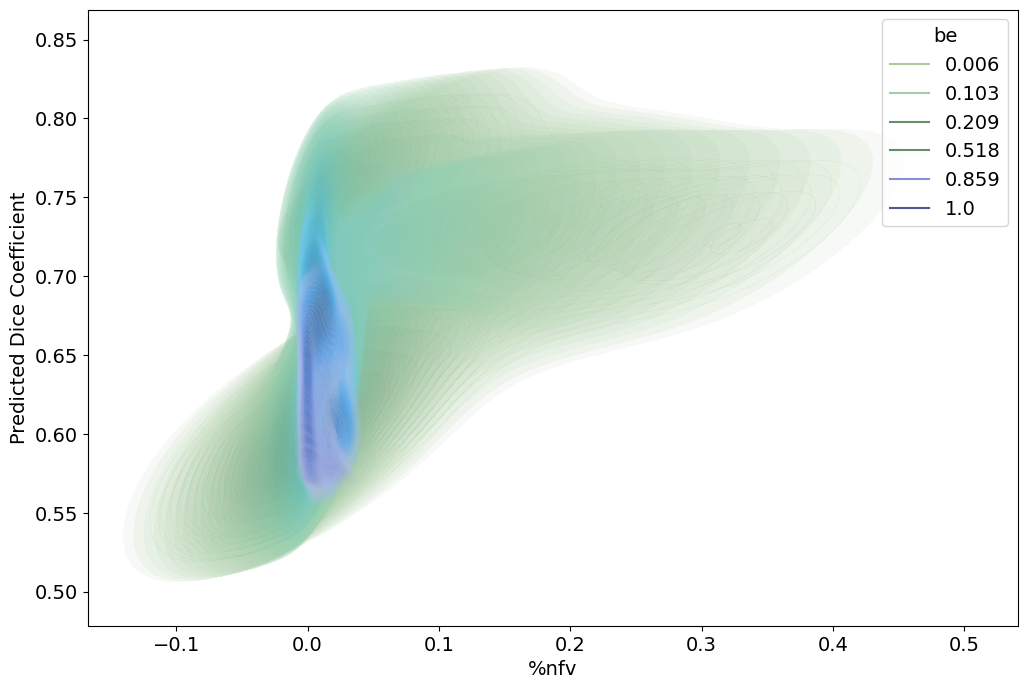

In [56]:
#be
filtered_be = [0.006,0.103,0.209, 0.518, 0.859, 1.0]
sns.kdeplot(data=formated_column, x="predicted_jac", y="predicted_dice", hue="be",  fill=True, legend=True, common_norm=False,  alpha=0.1, palette='crest')


custom_legend = [
    plt.Line2D([0], [0], color= '#accc9e',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#a5cda4',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#678d69',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#658c6b',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#8a8fd3',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#525796',  linestyle='-', markersize=5),

]
plt.xlabel("%nfv")
plt.ylabel("Predicted Dice Coefficient")
legend = plt.legend(title='be', handles=custom_legend, labels=filtered_le, frameon=True, loc='best')
plt.show()



### EXPERIMENT 4
Optimal Hyperparameter per label

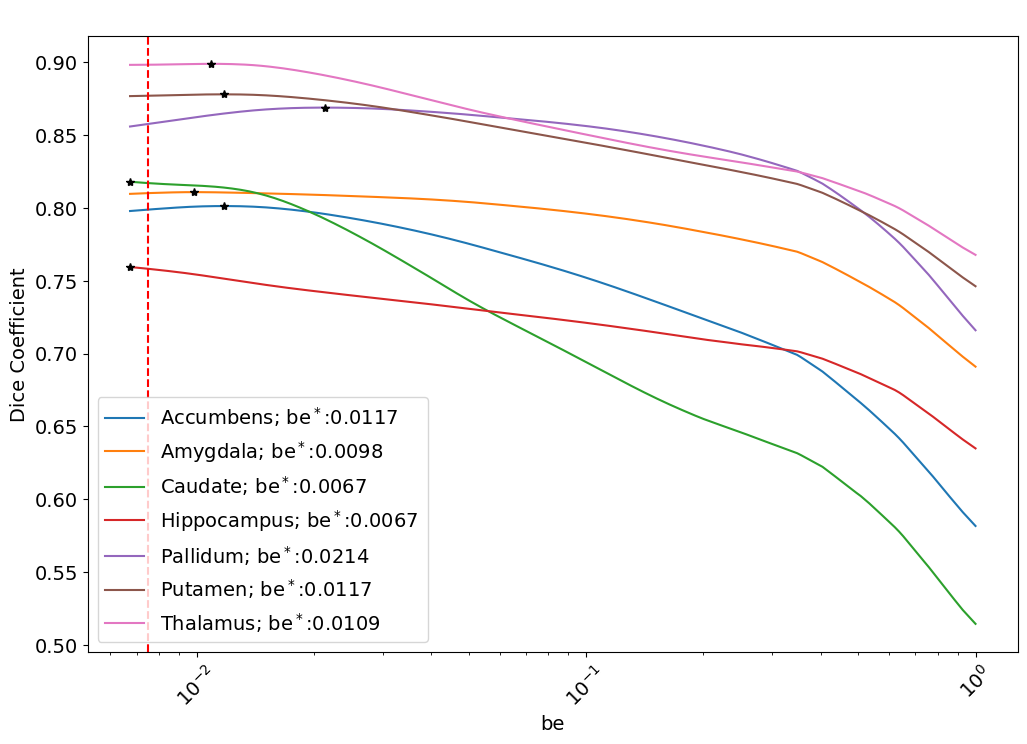

In [29]:
hyperpredict_exp4 = pd.read_csv("../results/symnet_niftyreg/mean_encoding_2HLnfv_nfv_194404_no_loss_weight_label.csv")

hyperpredict_exp4 = hyperpredict_exp4.groupby(['label', 'be']).mean().reset_index()
short_label = ['Thalamus',  'Amygdala', 'Pallidum', 'Caudate', 'Hippocampus', 'Putamen', 'Accumbens']

for idx, label in enumerate(hyperpredict_exp4["label"].unique()):
    if label in short_label:
        be_max_index = hyperpredict_exp4["be"][hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"].idxmax()]
        maximum_value = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"].max()
        lam = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["be"]
        sns.lineplot(x = lam, y = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"],label = f"{label}; be$^*$:{be_max_index:.4f} ")
        plt.plot(be_max_index, maximum_value, '*', color='black')

plt.axvline(x=0.0075, color='red', linestyle='--', alpha = 1.0)
plt.legend(loc="best")
plt.xlabel("be")
plt.ylabel("Dice Coefficient")
plt.xticks(rotation=45)
plt.xscale('log')
plt.title(" ");
# plt.xlim(0, 0.8);
plt.show();

/tmp/ipykernel_306869/1321984301.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 0.8);


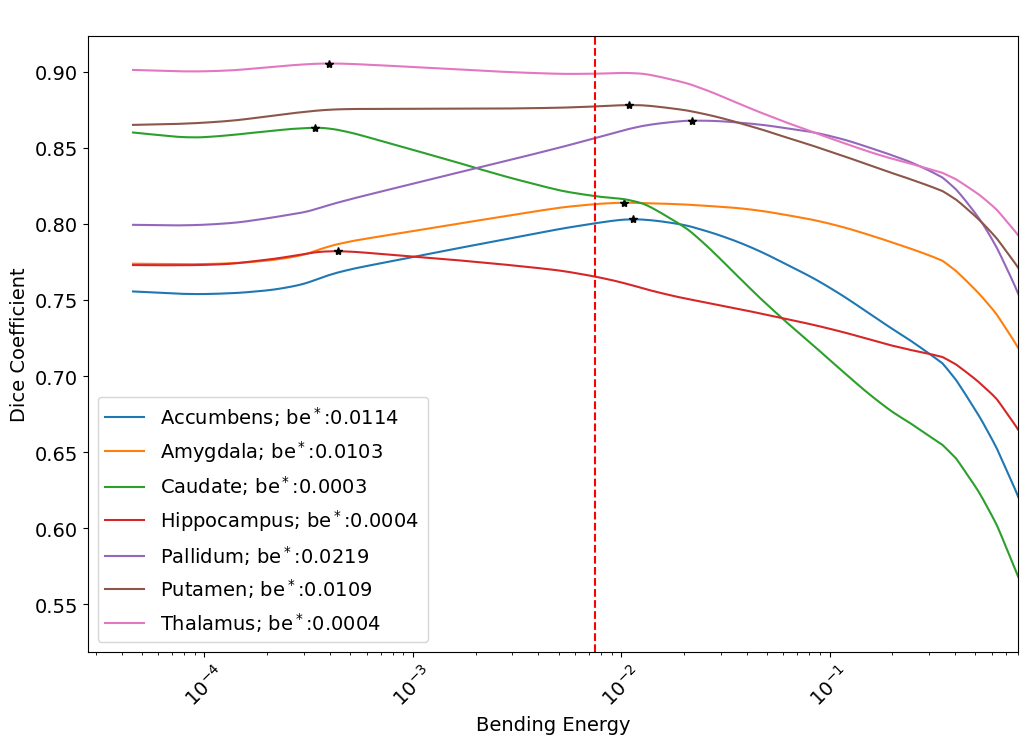

In [57]:

hyperpredict_exp4 = pd.read_csv("../results/symnet_niftyreg/final_result/2HL/2HL_label_no_optim.csv")

hyperpredict_exp4 = hyperpredict_exp4.groupby(['label', 'be']).mean().reset_index()
short_label = ['Thalamus',  'Amygdala', 'Pallidum', 'Caudate', 'Hippocampus', 'Putamen', 'Accumbens']

for idx, label in enumerate(hyperpredict_exp4["label"].unique()):
    if label in short_label:
        be_max_index = hyperpredict_exp4["be"][hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"].idxmax()]
        maximum_value = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"].max()
        lam = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["be"]
        sns.lineplot(x = lam, y = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"],label = f"{label}; be$^*$:{be_max_index:.4f} ")
        plt.plot(be_max_index, maximum_value, '*', color='black')

plt.axvline(x=0.0075, color='red', linestyle='--', alpha = 1.0)
plt.legend(loc="best")
plt.xlabel("Bending Energy")
plt.ylabel("Dice Coefficient")
plt.xticks(rotation=45)
plt.xscale('log')
plt.title(" ");
plt.xlim(0, 0.8);
plt.show();

### APPENDIX A1: Selecting spacing

10166


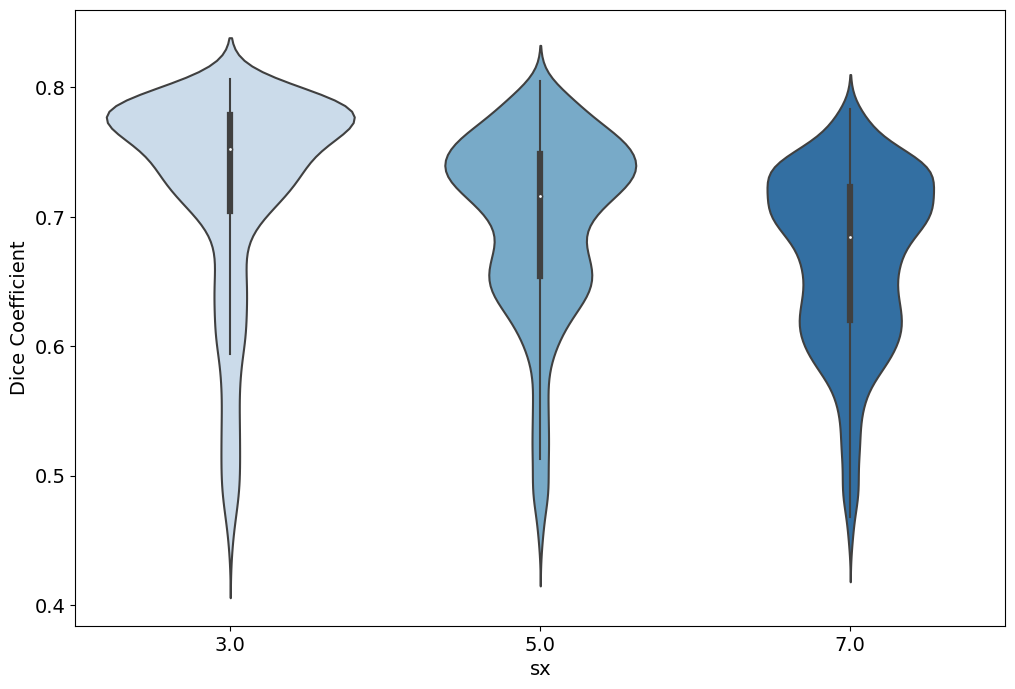

In [41]:
selecting_spacing = pd.read_csv("../results/symnet_niftyreg/selecting_spacing.csv")
selecting_spacing = selecting_spacing[selecting_spacing["predicted_nfv"] < (0.005 * maximum_nfv)].reset_index(drop=True)

print(len(selecting_spacing["sx"] == 3.0))
#plot violin plot for each sx
plt.rcParams.update({'font.size': 14})
sns.violinplot(x="sx", y="predicted_dice", data=selecting_spacing, palette="Blues", hue=None, split=False, as_cmap=True)
plt.xlabel("sx")
plt.ylabel("Dice Coefficient")
plt.show()



### COMPARING ALTERNATE METHODS

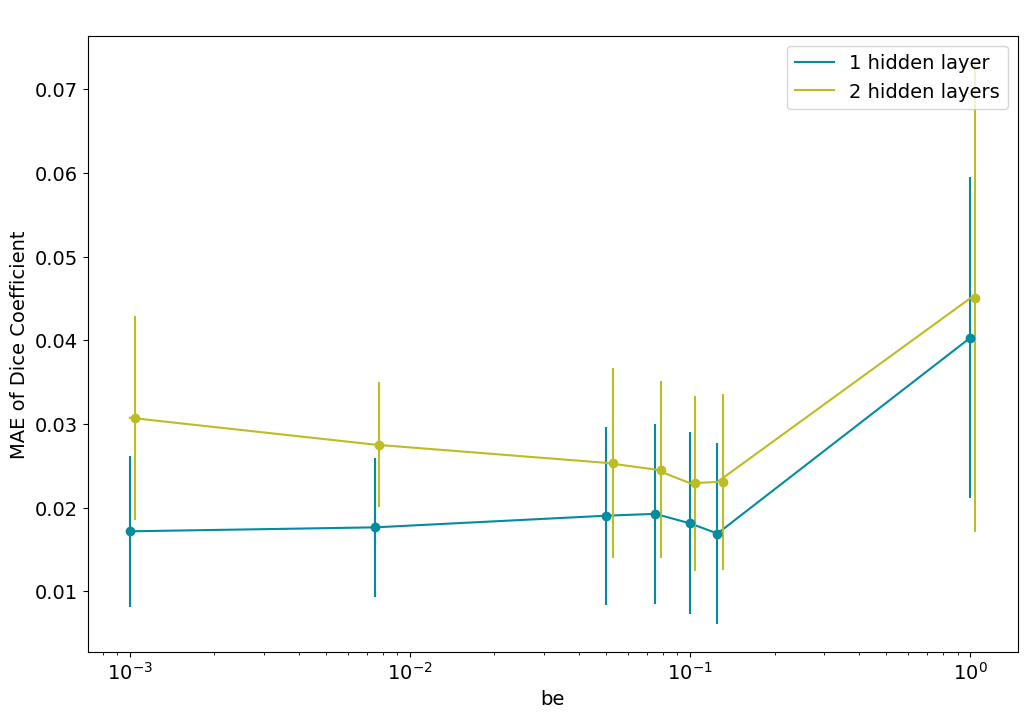

In [30]:
#using 1 hidden layer
one_hidden_layer = pd.read_csv("../results/symnet_niftyreg/alternative_models/mean_encoding_main_hyperpredict_network_1hidden_layers_image_target_values.csv")
two_hidden_layers = pd.read_csv("../results/symnet_niftyreg/alternative_models/mean_encoding_main_hyperpredict_network_2hidden_layers_image_target_values.csv")
be = one_hidden_layer["be"].unique()
lam_log = np.where(be > 0, np.log(be), np.log(be + 1e-5))


x_errorbar = [0.00002,0.00013 ,0.0015,0.0017,0.0020,0.003,0.02] 

one_hidden_layer["dice_difference"] = abs(one_hidden_layer["predicted_dice"] - one_hidden_layer["target_dice"])
one_hidden_layer["std_dev"] = np.std(one_hidden_layer["predicted_dice"] - one_hidden_layer["target_dice"], axis = 0)
mean_difference =  one_hidden_layer.groupby("be").mean().reset_index()
std_dev = one_hidden_layer.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["dice_difference"], color="#028ca1")
plt.errorbar(be, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#028ca1')


#two hidden layers
two_hidden_layers["dice_difference"] = abs(two_hidden_layers["predicted_dice"] - two_hidden_layers["target_dice"])
mean_difference =  two_hidden_layers.groupby("be").mean().reset_index()
std_dev = two_hidden_layers.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["dice_difference"], color="#bcbd22")
plt.errorbar([x*2 for x in x_errorbar]+be, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#bcbd22')


custom_legend = [
    plt.Line2D([0], [0], color='#028ca1',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
]
legend_labels = ['1 hidden layer', '2 hidden layers']

plt.legend(custom_legend, legend_labels)
plt.title(" ");
plt.xlabel("be");
plt.ylabel("MAE of Dice Coefficient");
plt.xscale("log")
plt.show()


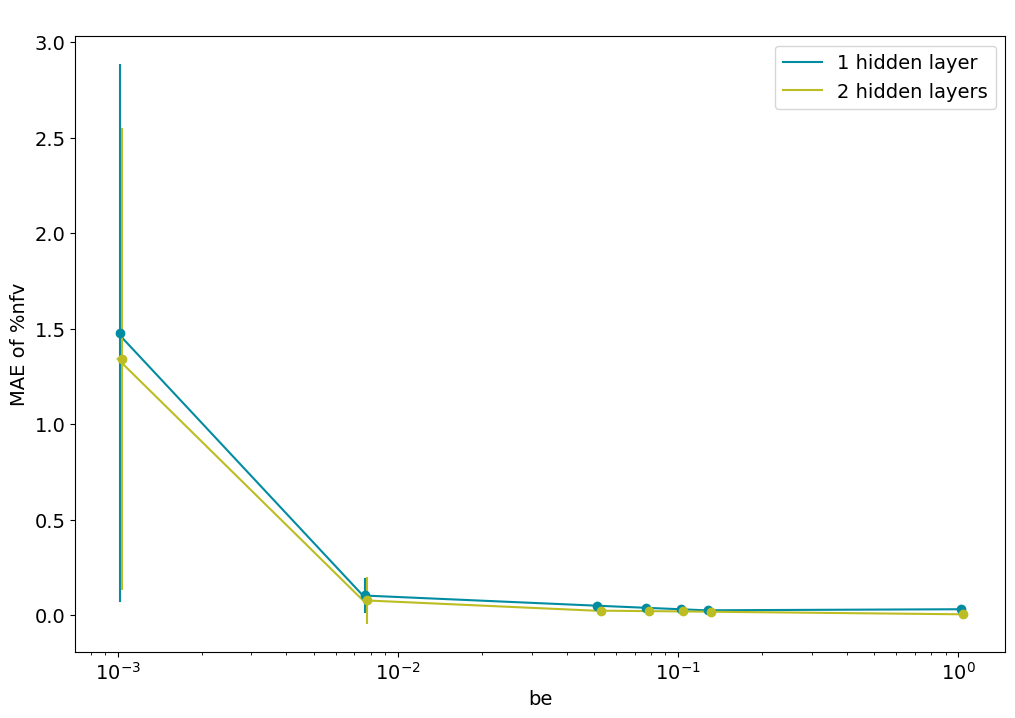

In [31]:
#nfv difference
one_hidden_layer["nfv_difference"] = abs((one_hidden_layer["predicted_nfv"]/ maximum_nfv)*100 - (one_hidden_layer["target_nfv"]/maximum_nfv)*100)
mean_difference =  one_hidden_layer.groupby("be").mean().reset_index()
std_dev = one_hidden_layer.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["nfv_difference"], color="#028ca1")
plt.errorbar(x_errorbar + be, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color = '#028ca1')

two_hidden_layers["nfv_difference"] = abs((two_hidden_layers["predicted_nfv"]/ maximum_nfv)*100 - (two_hidden_layers["target_nfv"]/maximum_nfv)*100)
mean_difference =  two_hidden_layers.groupby("be").mean().reset_index()
std_dev = two_hidden_layers.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["nfv_difference"], color="#bcbd22", errorbar="sd")
plt.errorbar([x*2 for x in x_errorbar]+be, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color='#bcbd22')


custom_legend = [
    plt.Line2D([0], [0], color='#028ca1', linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
]
legend_labels = ['1 hidden layer', '2 hidden layers',]

plt.legend(custom_legend, legend_labels)
plt.title(" ");
plt.xlabel("be");
plt.ylabel("MAE of %nfv");
plt.xscale('log')
plt.show()


#### Data Size

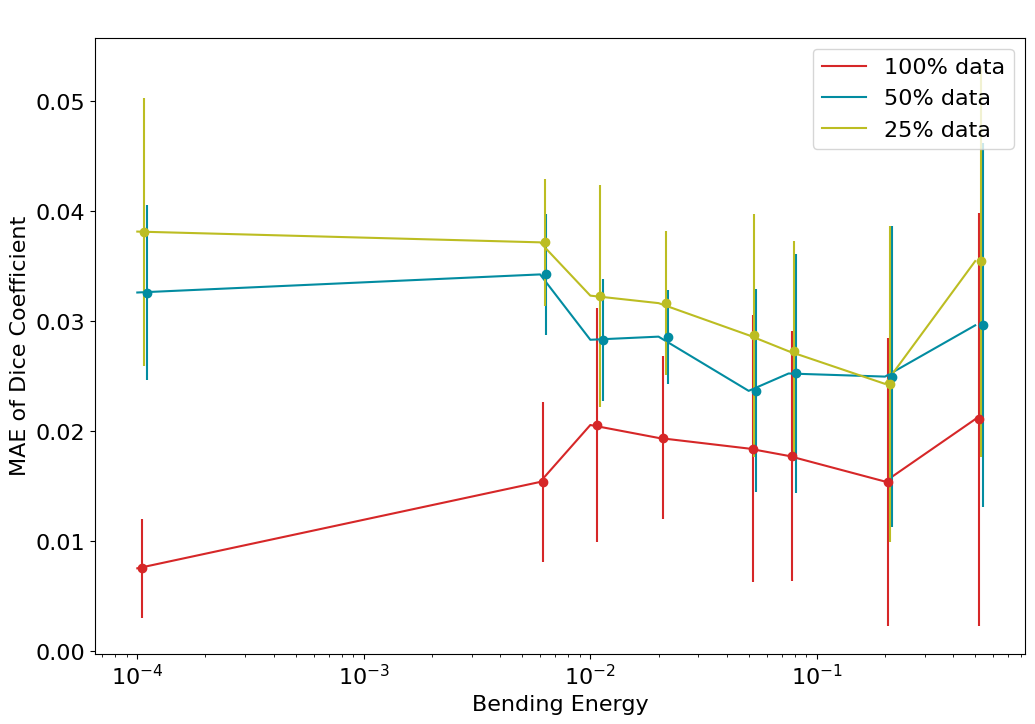

In [4]:

hundered_percent_data = pd.read_csv("../results/symnet_niftyreg/datasize/mean_encoding_1.0%_data_values_image_target.csv")
# hundered_percent_data = hundered_percent_data[hundered_percent_data["be"] >= 0.05]
fifty_percent_data = pd.read_csv("../results/symnet_niftyreg/datasize/mean_encoding_0.5%_data_values_image_target.csv")
twentyfive_percent_data = pd.read_csv("../results/symnet_niftyreg/datasize/mean_encoding_0.25%_data_values_image_target.csv")

be = fifty_percent_data["be"].unique()
lam_log = np.where(be > 0, np.log(be), np.log(be + 1e-5))


x_errorbar = [0.000005, 0.0002, 0.001, 0.0007, 0.002, 0.003, 0.007, 0.02]

#100% data
hundered_percent_data["dice_difference"] = abs(hundered_percent_data["predicted_dice"] - hundered_percent_data["target_dice"])
hundered_percent_data["std_dev"] = np.std(hundered_percent_data["predicted_dice"] - hundered_percent_data["target_dice"], axis = 0)
mean_difference =  hundered_percent_data.groupby("be").mean().reset_index()
std_dev = hundered_percent_data.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["dice_difference"], color="#d62728")
plt.errorbar(x_errorbar+be, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#d62728')

#50% data
fifty_percent_data["dice_difference"] = abs(fifty_percent_data["predicted_dice"] - fifty_percent_data["target_dice"])
fifty_percent_data["std_dev"] = np.std(fifty_percent_data["predicted_dice"] - fifty_percent_data["target_dice"], axis = 0)
mean_difference =  fifty_percent_data.groupby("be").mean().reset_index()
std_dev = fifty_percent_data.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["dice_difference"], color="#028ca1")
plt.errorbar([x*2 for x in x_errorbar]+be, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#028ca1')


#25% data
twentyfive_percent_data["dice_difference"] = abs(twentyfive_percent_data["predicted_dice"] - twentyfive_percent_data["target_dice"])
mean_difference =  twentyfive_percent_data.groupby("be").mean().reset_index()
std_dev = twentyfive_percent_data.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["dice_difference"], color="#bcbd22")
plt.errorbar([x*1.5 for x in x_errorbar]+be, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#bcbd22')


# Create custom legend
custom_legend = [
    plt.Line2D([0], [0], color='#d62728',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#028ca1',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
]
legend_labels = ['100% data','50% data', '25% data']

plt.legend(custom_legend, legend_labels)
plt.title(" ");
plt.xlabel("Bending Energy");
plt.ylabel("MAE of Dice Coefficient");
plt.xscale("log")
plt.show()


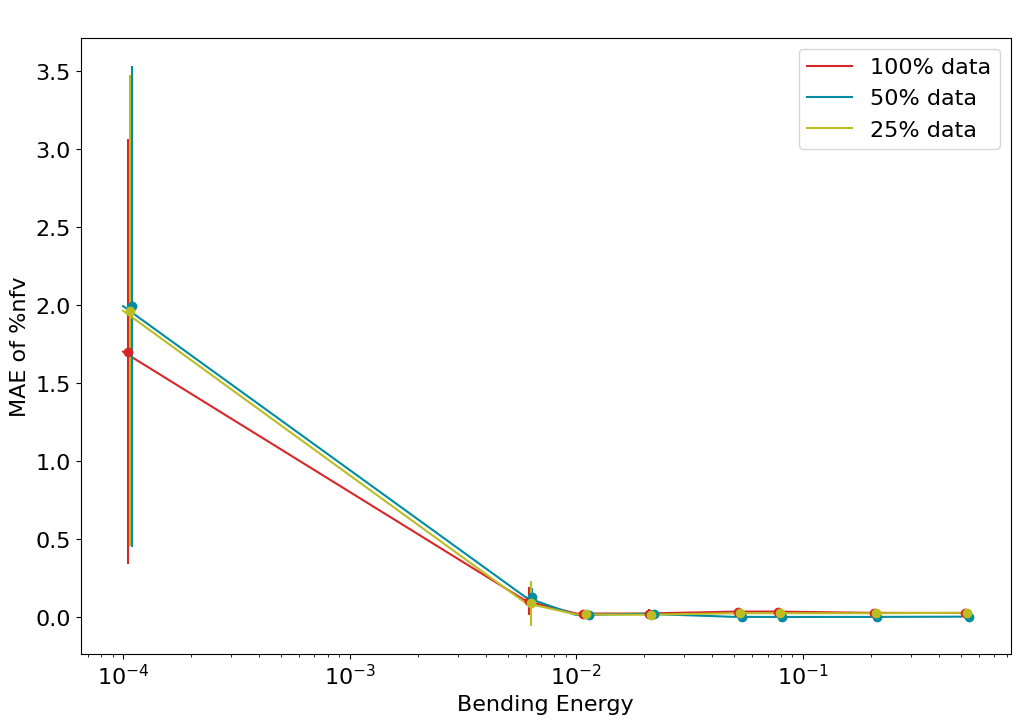

In [3]:
#nfv difference
hundered_percent_data["nfv_difference"] = abs((hundered_percent_data["predicted_nfv"]/ maximum_nfv)*100 - (hundered_percent_data["target_nfv"]/maximum_nfv)*100)
mean_difference =  hundered_percent_data.groupby("be").mean().reset_index()
std_dev = hundered_percent_data.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["nfv_difference"], color="#d62728")
plt.errorbar(x_errorbar + be, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color = '#d62728')

fifty_percent_data["nfv_difference"] = abs((fifty_percent_data["predicted_nfv"]/ maximum_nfv)*100 - (fifty_percent_data["target_nfv"]/maximum_nfv)*100)
mean_difference =  fifty_percent_data.groupby("be").mean().reset_index()
std_dev = fifty_percent_data.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["nfv_difference"], color="#028ca1", errorbar="sd")
plt.errorbar([x*2 for x in x_errorbar]+be, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color='#028ca1')

twentyfive_percent_data["nfv_difference"] = abs((twentyfive_percent_data["predicted_nfv"]/ maximum_nfv)*100 - (twentyfive_percent_data["target_nfv"]/maximum_nfv)*100)
mean_difference =  twentyfive_percent_data.groupby("be").mean().reset_index()
std_dev = twentyfive_percent_data.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["nfv_difference"], color="#bcbd22")
plt.errorbar([x*1.5 for x in x_errorbar]+be, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color='#bcbd22')


custom_legend = [
    plt.Line2D([0], [0], color='#d62728',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#028ca1',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
]
legend_labels = ['100% data', '50% data', '25% data']

plt.legend(custom_legend, legend_labels)
plt.title(" ");
plt.xlabel("Bending Energy");
plt.ylabel("MAE of %nfv");
plt.xscale('log')
plt.show()


### APPENDIX 4: Smooth interpolation


In [ ]:
from hyperpredict import hyper_predict, HyperPredictLightningModule
from utils import SetParams
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

registration_model = "niftyreg"
encoder_model = "symnet"
datapath = "data/oasis/"
pretrained_path = "models/pretrained_models/"
encoder_path = "symnet.pth"
start_channel = 4
range_flow = 0.4
imgshape = (160, 192, 224)
imgshape_4 = (160 / 4, 192 / 4, 224 / 4)
imgshape_2 = (160 / 2, 192 / 2, 224 / 2)
train_batch_size =1
validation_batch_size = 1
test_batch_size = 1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = 1
maximum_nfv = 160 * 192 * 224

encoder = SetParams.set_encoder(encoder_model,  pretrained_path + encoder_path, start_channel, imgshape, imgshape_2, imgshape_4, range_flow)
training_generator, validation_generator, test_generator, testing_sub = SetParams.set_oasis_data(datapath, train_batch_size, validation_batch_size, test_batch_size, encoder_model)

print("data loaded", len(training_generator), len(validation_generator), len(test_generator), len(testing_sub))
select_in_features = {"clapirn_clapirn": 32, "clapirn_niftyreg": 80, "symnet_clapirn": 88, "symnet_niftyreg": 120}

# select_in_features = {"clapirn_clapirn": 64, "clapirn_niftyreg": 80, "symnet_clapirn": 200, "symnet_niftyreg": 232}
in_features = select_in_features[encoder_model + "_" + registration_model]
out_features = 36
mapping_features = 16 if encoder_model == "clapirn" else 32
model = HyperPredictLightningModule(hyper_predict(in_features, mapping_features, out_features),  registration_model, encoder_model, imgshape, encoder, batch_size)
model.load_state_dict(torch.load("models/checkpoints/symnet_niftyreg/default_2HLnfv_nfv_194404_no_loss_weight.ckpt")["state_dict"])


be = np.linspace(-5, 0, 500)
be = np.exp(be)
# be = [0.001,0.0075, 0.05, 0.075, 0.1, 0.125, 1]
sx = 5
for params in model.parameters():
    params.requires_grad = False


model.eval()
model.to(device)
# dice per image per be
columns = ["pair_idx", "moving_index", "fixed_index", "predicted_dice", "be", "sx", "predicted_nfv"]

dice_average_per_image_per_be = pd.DataFrame(columns = columns)

#dataframe for dice per label 
columns_label = ["pair_idx","moving_index", "fixed_index", "predicted_dice","be", "sx", "label", "predicted_nfv"]

dice_average_per_label_per_be = pd.DataFrame(columns = columns_label)
count  = 1
print("len test generator", len(testing_sub))
with torch.no_grad():
    for pair_idx, data in enumerate(testing_sub):
        if pair_idx > 0:
            break
        
        pred = []
        tar = []    
        data[0:4] = [d.to(device) for d in data[0:4]]
        per_image, per_label = model.test_niftyreg_200_be(pair_idx, data, be, sx)
  
        
        print(count)
        count += 1
        

       

        



#### Linear elasticity with a fixed bending energy

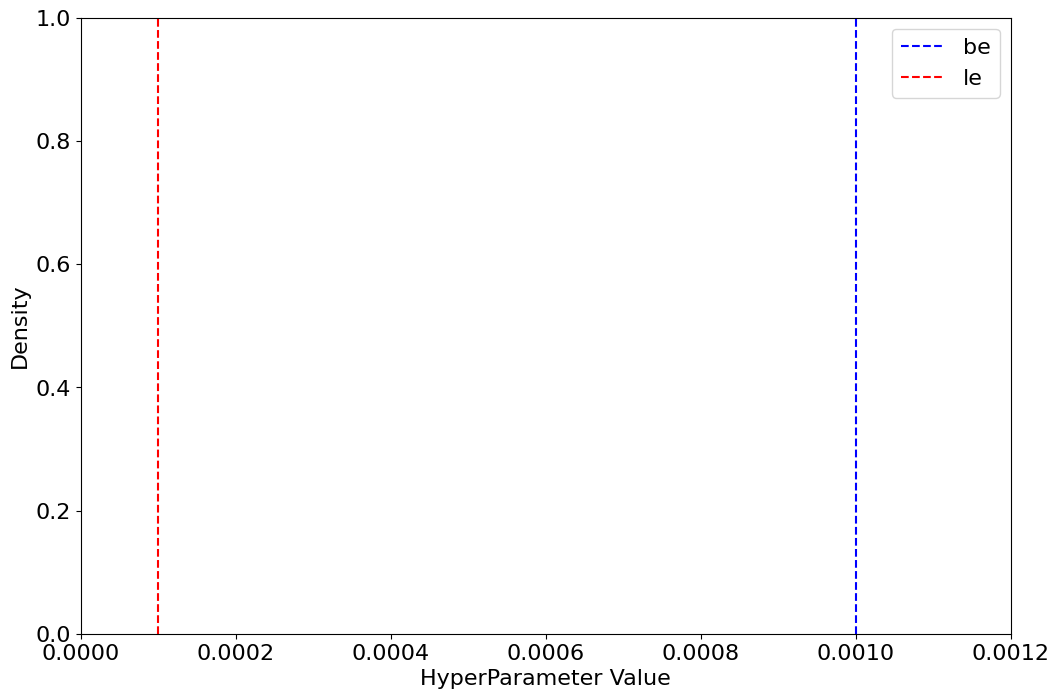

In [75]:
be_le = pd.read_csv("../results/symnet_niftyreg/mean_encoding_linear_elastisity_image.csv")
be_le = be_le[be_le["predicted_jac"] < (0.005 * maximum_nfv)]
be_le = be_le.groupby(["pair_idx"]).apply(lambda x: x.loc[x['predicted_dice'].idxmax()]).reset_index(drop=True)
#plot distribution of be
plt.axvline(be_le["be"].unique(),  color='b', linestyle='--', label='be')
plt.axvline(9.99999975e-05,  color='r', linestyle='--', label='le')
plt.xlim(0, be_le["be"].max()+0.0002)
plt.legend(loc='upper right')
plt.ylabel("Density")
plt.xlabel("HyperParameter Value")
plt.show()
